In [2]:
import scanpy as sc
import scvelo as scv
import sys
sys.path.insert(1, "/Users/carolinaatria/Desktop/ADesktop/Studium/Master/master_thesis/sponge/data_from_roger/python/PART1")
from marker_ids_hardcoded import marker_data
marker_gene_names = ["Myc","Vasa","Piwi","Eif","Chek2","Phgdh","Mdh1","Whrn","Espn","Tekt","Myh7","Alas2","Pygm","Silicatein"]
sc.settings.verbosity = 0
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import bisect
from numpy import unique
import numpy
import matplotlib
import scvelo as scv
# from cellrank.tl.kernels import CytoTRACEKernel
from cellrank.kernels import CytoTRACEKernel
marker_list = marker_data(version="isoseq")

In [2]:
version = "Isoseq"
file = "/Users/carolinaatria/Desktop/ADesktop/Studium/Master/master_thesis/sponge/data_from_roger/python/data.nosync/Sdomuncula_IsoseqStringtie/filtered_feature_bc_matrix.h5"
adata = sc.read_10x_h5(file)
visualisations = True
# now we normalise and logarithmise the data
sc.pp.calculate_qc_metrics(adata, percent_top=None, log1p=False, inplace=True)
sc.pp.normalize_total(adata, target_sum=2000)
sc.pp.log1p(adata)
# now we regress the counts and scale them
# sc.external.pp.magic(adata,random_state=2)
sc.pp.highly_variable_genes(adata, flavor="seurat")
sc.pp.regress_out(adata, ['total_counts'])

In [3]:
adata

AnnData object with n_obs × n_vars = 2671 × 13144
    obs: 'n_genes_by_counts', 'total_counts'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg'

In [3]:
#identify high variable genes
# scale each gene to unit variance, clip values exceeding standart deviation 2
sc.pp.scale(adata, max_value=2)
sc.tl.pca(adata, svd_solver='arpack', n_comps=350)
print("test3")
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=10)
print("test4")
# ADDING OBS (leiden, paga, umap, tsne)
sc.tl.leiden(adata, resolution=0.2, key_added="clusters")
sc.tl.paga(adata, groups='clusters')
sc.pl.paga(adata, colors="clusters", show=False)
sc.tl.umap(adata, init_pos="paga")

test3


: 

adata genes:
 AnnData object with n_obs × n_vars = 2671 × 13144
    var: 'gene_ids', 'feature_types', 'genome'
  Running MAGIC with `solver='exact'` on 13144-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.


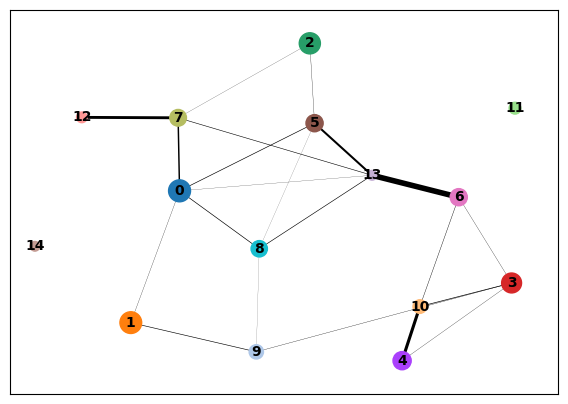

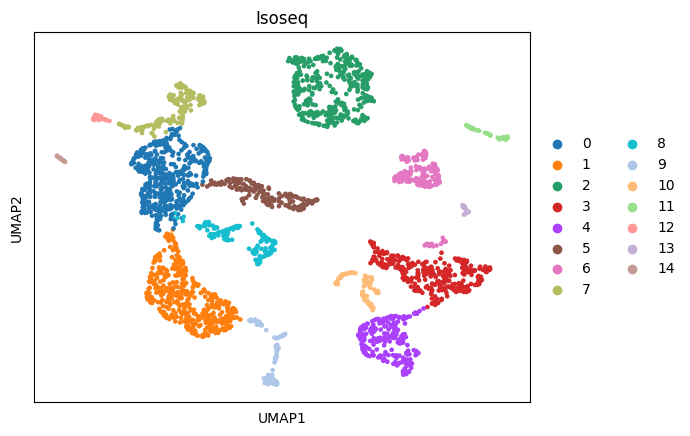

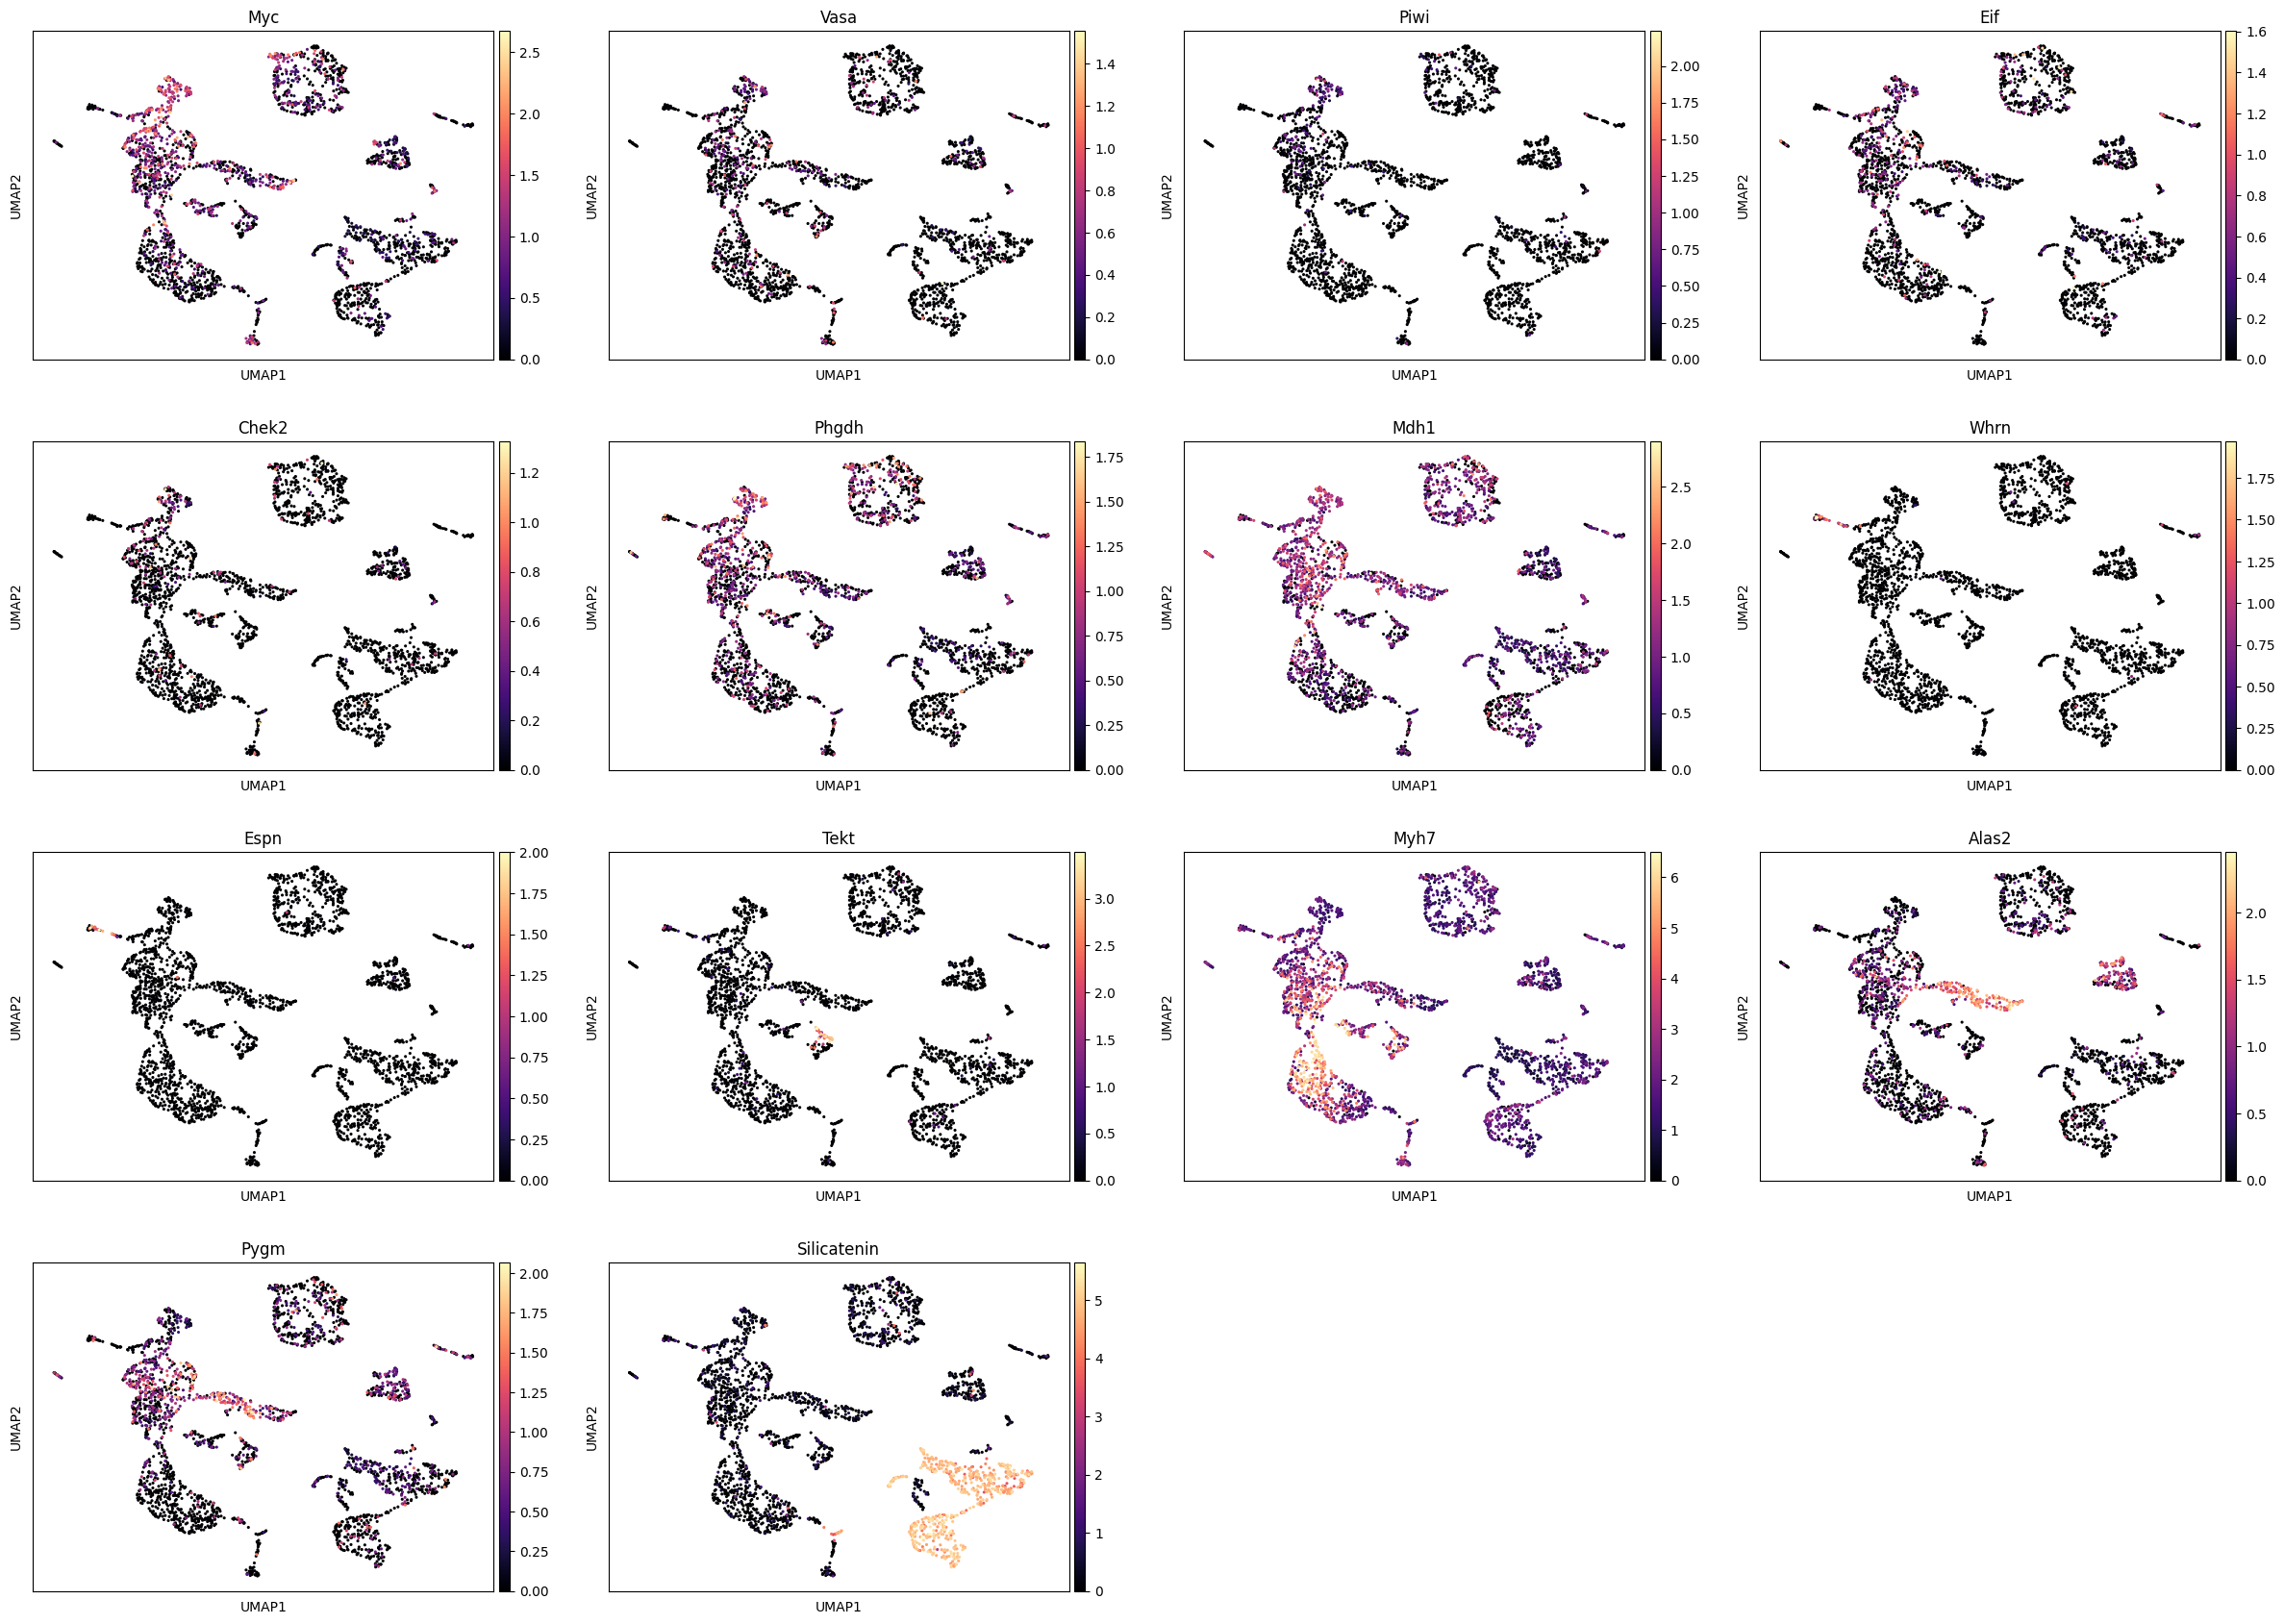

In [24]:
# sc.pl.highest_expr_genes(isoseq_adata, n_top=5,show=visualisations)
# sc.pp.filter_cells(isoseq_adata, min_genes=150) #150 
# sc.pp.filter_cells(isoseq_adata,max_counts=9500) #9500
# sc.pp.filter_genes(adata,min_counts=10) #filtering out all genes that appear in less than 10 cells

print("adata genes:\n",isoseq_adata)
sc.pp.calculate_qc_metrics(isoseq_adata, percent_top=None, log1p=False, inplace=True)
# sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')
# adata = adata[adata.obs.n_genes_by_counts < 2500, :]
sc.pp.normalize_total(isoseq_adata, target_sum=2000)
sc.pp.log1p(isoseq_adata)

sc.external.pp.magic(isoseq_adata,random_state=2)

sc.pp.highly_variable_genes(isoseq_adata, flavor="seurat")
# sc.external.pp.dca(adata)

#identify high variable genes

# adata.raw = adata
# adata = adata[:, adata.var.highly_variable]
#regress out effects of total counts per cell, scale data to unit variance
sc.pp.regress_out(isoseq_adata, ['total_counts'])

# scale each gene to unit variance, clip values exceeding standart deviation 2
sc.pp.scale(isoseq_adata, max_value=2)
sc.tl.pca(isoseq_adata, svd_solver='arpack', n_comps=50)
sc.pp.neighbors(isoseq_adata, n_neighbors=10, n_pcs=10)
sc.tl.umap(isoseq_adata)

# ADDING OBS (leiden, paga, umap, tsne)
sc.tl.leiden(isoseq_adata, resolution=0.2, key_added="clusters")

sc.tl.paga(isoseq_adata, groups='clusters')
sc.pl.paga(isoseq_adata, colors="clusters", show=visualisations)
sc.tl.umap(isoseq_adata, init_pos="paga")
# sc.tl.tsne(adata,n_pcs=10)

cluster_counts = isoseq_adata.obs['clusters'].value_counts()
isoseq_adata[isoseq_adata.obs['clusters'].isin(cluster_counts[cluster_counts > 50].index)]
sc.pl.umap(isoseq_adata, color="clusters",title=version)

# sc.pl.dotplot(adata, marker_list, groupby='clusters', use_raw=False)

sc.pl.umap(isoseq_adata,color=marker_list,title=marker_gene_names,color_map="magma",size=20,use_raw=False,vmin=0,vmax=2)


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


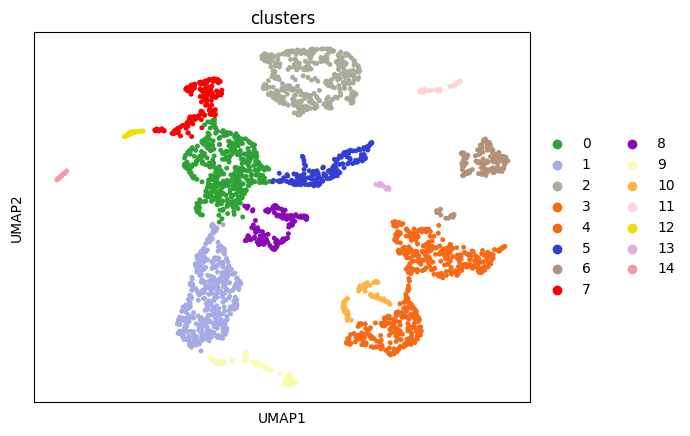

In [3]:
#color scheme for thesis

adata = sc.read_h5ad("/Users/carolinaatria/Desktop/ADesktop/Studium/Master/master_thesis/sponge/data_from_roger/python/data.nosync/saved_analysis/subdom.h5ad")

cmap = matplotlib.cm.get_cmap('tab20', 15)
map = []
for i in range(cmap.N):
    rgba = cmap(i)
    map.append((matplotlib.colors.rgb2hex(rgba)))

map[0] = "#2FA236" # intermediates
map[3] = "#F76915" #sclerocyte
map[4] = "#F76915" # sclerocytes
map[5] =  "#333ED4" # metabolocytes
map[7] = "#FD0100" # archeocytes
map[8] = "#8809B5" # pinacocytes
map[12] ="#EEDE04" # choanocytes
map[10] = "#FFB347" #little sclerocyte

map[1] = "#A6ABE5"
map[2] = "#A8AD99" #big island
map[6] = "#B69179"
map[9] = "#FAFBB3"
map[11] ="#FFD2D5"
map[13] = "#E6AAE9"
map[14] = "#F698A5"
adata.uns["clusters_colors"] = map

sc.pl.umap(adata,color="clusters",size=50)

#violet (metabolocytes), green (intermediate), blue (pinacocytes), red (archeocytes), orange (sclerocytes), light orange (sclerocytes), light green (choanocytes), pink

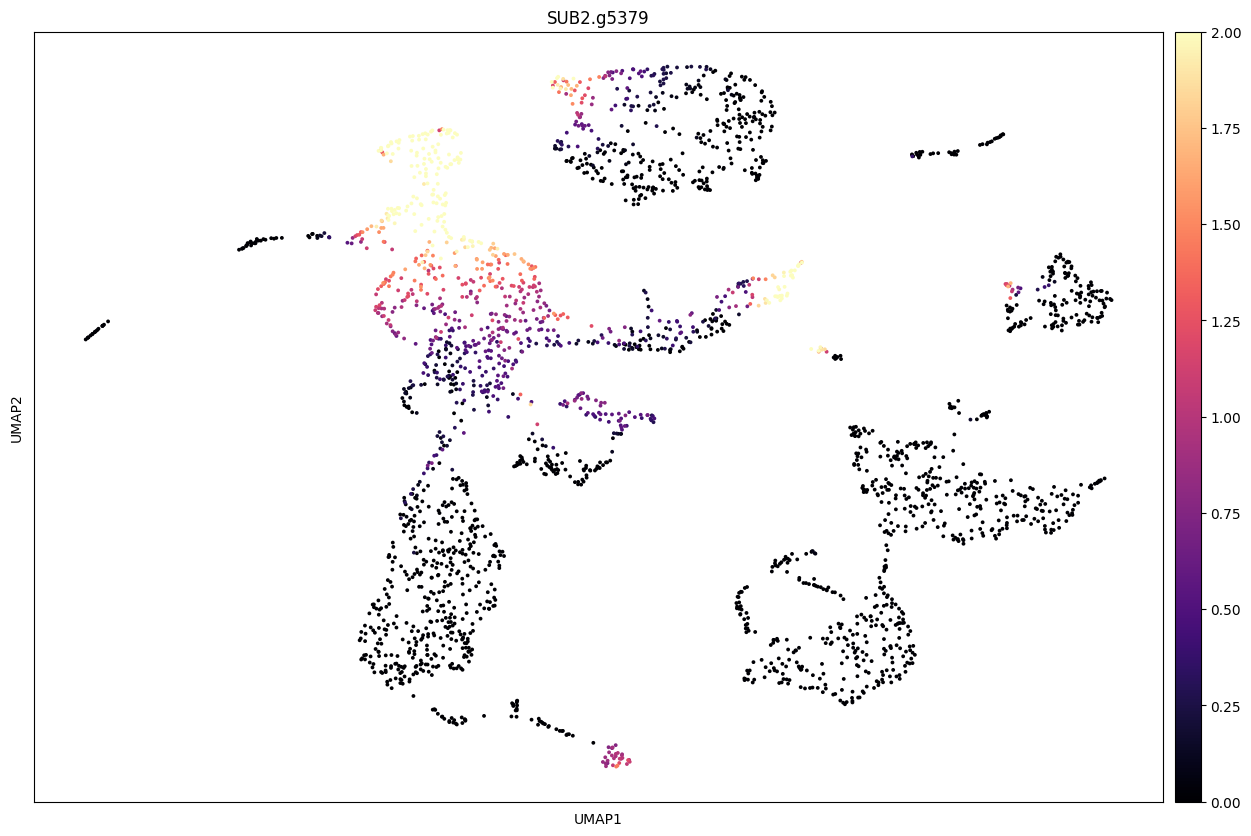

In [22]:
plt.rcParams["figure.figsize"] = [16,10]
sc.pl.umap(adata,color="SUB2.g5379",use_raw=False,vmin=0,vmax=2, size=30,color_map="magma")

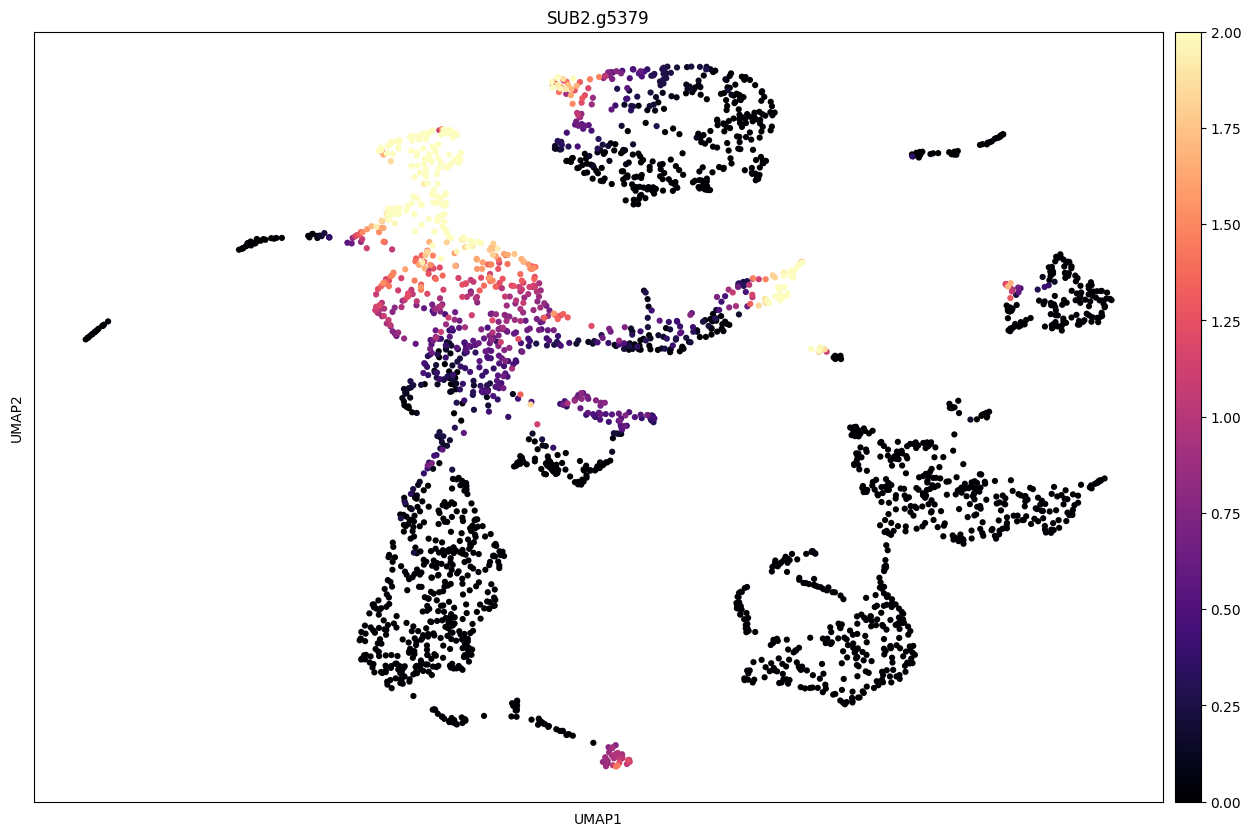

In [26]:
# import scvelo as scv
# from cellrank.tl.kernels import CytoTRACEKernel
# adata = sc.read_h5ad("/Users/carolinaatria/Desktop/ADesktop/Studium/Master/master_thesis/sponge/data_from_roger/python/data.nosync/saved_analysis/subdom.h5ad")

# adata.layers["spliced"] = adata.X
# adata.layers["unspliced"] = adata.X
# scv.pp.moments(adata, n_pcs=30, n_neighbors=30)
# ctk = CytoTRACEKernel(adata)

# sc.pl.umap(adata, color=["ct_pseudotime"],legend_loc="right", size=80,color_map="gnuplot2")
sc.pl.umap(adata, color="SUB2.g5379",legend_loc="right", size=80,color_map="magma",use_raw=False,vmin=0,vmax=2)


### for aim3: analysing differentiation trajectories ###
if you want to select a trajectory, use the following code block. In this code, a csv file with cell barcodes (obtained by R script) is read in and the adata object is subsetted. For the current trajectory, the expression of all genes is calculated and stored in a json file

In [173]:
import pandas as pd
import json
import numpy as np
from collections import defaultdict

# Read the CSV file in Python
df = pd.read_csv("/Users/carolinaatria/Desktop/ADesktop/Studium/Master/master_thesis/sponge/data_from_roger/python/thesis/trajectory/trajectory_jsons/new_cluster_trajectory.csv")
bc = df["x"].to_list()
#bc = ["AACAGGGAGATCGCCC-1","AACGTCAGTCCAATCA-1","AATAGAGAGCCTAGGA-1","AATCGACCACGTTGGC-1","ACAACCAAGAGTACCG-1","ACACGCGCAACCGCCA-1","ACACTGAGTGCGTTTA-1","ACCAAACTCTCAAAGC-1","ACCCTTGGTCTCGCGA-1","ACCGTTCAGAATCGTA-1","ACGGTCGTCTGTAACG-1","ACGTCCTCAGCGACAA-1","ACGTTCCGTAACGATA-1","ACTGTCCTCAGGAGAC-1","AGAAGTAGTCGATGCC-1","AGACACTAGCCTGAAG-1","AGAGAATCACTCTAGA-1","AGCGCTGGTAGATGTA-1","AGCGTCGAGCCATCCG-1","AGGGCTCCAACACGTT-1","AGGGCTCCAGGAATAT-1","AGGGTCCGTAGAATGT-1","AGGTTACGTATTGAGA-1","AGGTTGTGTAAGTTGA-1","AGTACCAAGAAGCCAC-1","ATACCTTGTAATACCC-1","ATAGACCTCAGAGTTC-1","ATAGAGATCATTTGGG-1","ATCCTATGTGGAAGTC-1","ATCGGATTCACAACCA-1","ATCGTCCCAAGACGGT-1","ATCTCTATCTACACTT-1","ATGAAAGGTAAGGCCA-1","ATGAGGGTCCTACTGC-1","ATGGAGGAGGGTCTTT-1","ATGTCTTTCCGCACTT-1","ATTATCCGTGGACCAA-1","ATTCAGGAGAGTGAAG-1","ATTTACCGTCGTTCAA-1","ATTTCTGTCCAGTGCG-1","CAAAGAAAGGTCGTAG-1","CAACAACCAAAGAACT-1","CAAGAGGGTCGTACAT-1","CAATCGACAGTGGTGA-1","CACATGATCTCTATAC-1","CACGTGGGTACAAGTA-1","CAGAGCCTCTTCTGTA-1","CAGCCAGTCATCGACA-1","CAGTGCGTCTCAACCC-1","CATCCGTTCACACCGG-1","CATGCCTAGTCAGAGC-1","CCAAGCGAGTAAATGC-1","CCAAGCGTCCCTCGTA-1","CCAATGACAGAGGGTT-1","CCCGGAAGTTAAACAG-1","CCCTTAGCAAATGGTA-1","CCGGTGAGTTTGGGAG-1","CCTCTAGAGAAGGTAG-1","CCTCTAGTCTCCCAAC-1","CCTTTGGCAATGGGTG-1","CGAAGGAAGTTAACGA-1","CGAAGGACATGTACGT-1","CGGAACCCATGTGGTT-1","CGGAGAAAGTGTAGTA-1","CGGGTGTCACTTGAGT-1","CTACAGACACAAGCTT-1","CTAGGTAGTACACGCC-1","CTATCTACAGGAACCA-1","CTCACTGCAACACGTT-1","CTCAGGGCAAGGCTTT-1","CTCAGGGCACCACATA-1","CTGCATCGTGACAGGT-1","CTGCTCACAACGGCTC-1","CTTACCGTCTGAGTCA-1","CTTCCGAAGTTTCAGC-1","GAAGCGAAGGTCACAG-1","GACAGCCTCCTTATGT-1","GACCTTCCATTAAAGG-1","GACGCTGAGGTTTGAA-1","GACTATGAGTTTGGCT-1","GAGGGTAGTGGACCAA-1","GAGTTTGAGAGATTCA-1","GATGGAGCACCCTCTA-1","GCAGGCTGTTCTAACG-1","GCATCTCTCGCTGTTC-1","GCGGAAAAGACTCCGC-1","GCTCAAATCGCCATAA-1","GCTGGGTAGCAACAGC-1","GGAATCTTCCCGAACG-1","GGAATGGCACATGAAA-1","GGCTTTCAGCAACAAT-1","GGCTTTCCACGAGGAT-1","GGGACAACATCTGGGC-1","GGGACCTGTAGTGTGG-1","GGGACTCAGTGATTCC-1","GGTAACTCAAGTGACG-1","GGTGGCTCACTGGCGT-1","GTCACGGTCTCTCCGA-1","GTCAGCGCAGTTGCGC-1","GTCAGCGTCAAAGGTA-1","GTCGTAATCGACACCG-1","GTCTACCCAGGCAATG-1","GTCTACCCATTCCTCG-1","GTCTAGACAGCACGAA-1","GTGCGTGTCAGCCTCT-1","GTGGAAGCATCCGTGG-1","GTGTCCTGTGTCTAAC-1","GTGTGATGTTCTCCCA-1","GTTGCGGTCCACCTCA-1","TAACACGCAAACCATC-1","TAACCAGTCGCTGTCT-1","TAACGACCAACGTATC-1","TACAGGTGTATCAAGA-1","TACATTCGTAACACCT-1","TACCTCGGTTAAGGGC-1","TATCGCCTCAATCAGC-1","TATGTTCAGAAATTCG-1","TCACTATTCTCTGGTC-1","TCACTCGGTACTGCGC-1","TCATTCAGTCCCAAAT-1","TCATTTGCATGTGTCA-1","TCCCACAGTAGCGAGT-1","TCGATTTCACACACTA-1","TCGCTTGCATTCTGTT-1","TCTAACTGTGGCTTAT-1","TCTCAGCAGCCTCAAT-1","TCTCAGCAGGACAAGA-1","TCTGGCTCAGACCTGC-1","TCTGGCTGTAATGATG-1","TCTGGCTTCTGTCGCT-1","TCTTAGTCAGTCAGTT-1","TGAACGTAGTAGGAAG-1","TGACGCGTCTACAGGT-1","TGAGCGCTCTGTAACG-1","TGCACGGAGGCTCTCG-1","TGCGGCAGTGGGACAT-1","TGGAGGATCCAACCAA-1","TGGATCATCGCGTCGA-1","TGGCGTGGTAGGAGTC-1","TGGGCTGCAGCATCTA-1","TGGTTAGTCCGACATA-1","TGTCCTGGTCCGAAGA-1","TGTGATGCAAGGTCTT-1","TGTGCGGTCTCGCCTA-1","TTACGCCGTGTTAGCT-1","TTAGGCACAGGCACAA-1","TTCAGGAGTAGCTGAG-1","TTCCTAACACCAGCGT-1","TTCGGTCGTTCTCCAC-1","TTCTCTCTCGAGAAGC-1","TTGCATTTCCGCACGA-1","TTGCTGCGTTCTAACG-1","TTGGATGCATATACCG-1","TTGGGATTCCATCCGT-1","TTTATGCCATAGGTAA-1"]

traj_2 = adata[bc, :]

# Sorting the selected barcodes based on pseudotime scores
sorted_barcodes = traj_2.obs.sort_values(by='ct_pseudotime')

# Selecting the first 100 barcodes with the lowest pseudotime scores
# final_selected_barcodes = sorted_barcodes.index[:150]
# traj_2 = adata[final_selected_barcodes,:]
sc.pl.umap(traj_2,color="clusters",size=50)

In [172]:
traj_2.uns['log1p']["base"] = None
expression = defaultdict(str)

sorted_cells = traj_2.obs.sort_values("ct_pseudotime").index.to_list()
for gene in traj_2.var_names:
    expr_per_gene = []
    for cell in sorted_cells:
        expr_per_gene.append(traj_2[cell,gene].X[0][0])
    expression[gene] = expr_per_gene

converted_data = {key: [float(value) for value in values] for key, values in expression.items()}

file_path = '/Users/carolinaatria/Desktop/ADesktop/Studium/Master/master_thesis/sponge/data_from_roger/python/thesis/trajectory/trajectory_jsons/new_cluster_trajectory.json'

with open(file_path, 'w') as file:
    json.dump(converted_data, file)